# IQCIS Project 1: Grover's Algorithm
## Due April 5th, 2025

<Double-click and type your name here!>

In this project, we will introduce Grover's algorithm and how it is used to solve database search problems. We'll implement the algorithm together using Qiskit for one case, and then challenge you to implement the algorithm for other cases and prove the result.

## Contents

1. [Introduction](#introduction)
2. [Getting Started](#getstarted)
3. [Example: 2-Qubit Grover Search](#2qubits)
4. [Deliverables](#deliverables)
5. [Resources](#resources)

## 1. Introduction <a id='introduction'></a>

Grover search is one way that a quantum computer provides a computational advantage over classical computers. Say we want to look through a long list with $N$ items total. We're looking for some particular item, but the list isn't sorted and we don't know where that item is. Classically, when searching for this value in a databse, we must look through **half** of the elements in the database on average and, in the worst case, what we want is at the very end and we must look through **everything**! Through a clever algorithm, Grover search provides *quadratic* speedup compared to classical search: for a database with $N$ elements, instead of taking $N$ steps to find the item, we must only perform roughly $\sqrt{N}$ quantum operations. 

It's recommended that you use the resources listed in [Section 5](#resources). In particular, you need to learn about Grover's algorithm using [this Qiskit tutorial (link)](https://qiskit.org/textbook/ch-algorithms/grover.html).

## 2. Getting Started <a id='getstarted'></a>

This project assumes that you can write and run Qiskit code. The easiest way to do this is to use qBraid Lab, a website that offers a way to run jupyter notebooks with a Qiskit environment. This website has all the development tools needed for this project, so all you need to do is create an account. Another option is to install the Qiskit tools on your machine, see section [Section 5](#resources). The project will assume you are using the first option.

To import a notebook into qBraid Lab, click on the 'Files' tab on the left, then click on the upload symbol (looks like an up arrow) that is near the top of the Files panel. Then select your .ipynb file. You should also make sure to download (to the server, not your machine) the Qiskit library by going to the 'ENVS' tab on the right side of the screen, click the '+ ADD' button, search for 'Qiskit', and download the latest version possible. You may have to switch kernels to the one you just downloaded. To do this, click on the Python version near the top right of the notebook window and change it to a Python version with Qiskit listed ('Python 3.11 [Qiskit 1.3.2]' for example).

To start, make sure you double-click and modify the second cell of this notebook to add your name. You can use *Ctrl+Enter* to finish editing a text cell and close it. All of the cells in this notebook can be edited, but you only need to run and add the code you're told to.

First, run the below code to set up the environment by importing the basic Qiskit library functions and visualizations. You can run the cell by clicking on it and clicking the **Play** button at the top of the window, or by clicking on it and pressing **Shift+Enter**. You'll see the kernel become busy in the status line at the bottom of the window. Any errors or output wil be displayed below the cell (we shouldn't have any here). 

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# import Qiskit functions and compilers
from qiskit import transpile
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit_aer import AerSimulator

# import basic plot and visualization tools
from qiskit.visualization import *

## 3. Example: 2-Qubit Grover Search <a id='2qubits'></a>

In this section, we'll step through code that will perform a 2-qubit grover search for the state $|11\rangle$. This code is already written and you'll just need to run each code block in order. Later, you'll need to develop the search operation for each of the other 2-qubit states: $|00\rangle$, $|01\rangle$, and $|10\rangle$. Feel free to copy and edit the relevant blocks when it comes time to develop your search for the other states.

The Grover search algorithm relies on the application of the **Controlled-Z Gate** (or CZ gate for short) for its oracle and diffusion operators. This gate flips the phase of the target qubit if the control qubit is in the $|1\rangle$ state. When applied to the state corresponding to the desired search item, this gate performs the *phase inversion* step of Grover's algorithm. The matrix representation of a CZ gate is:

\begin{equation}
        CZ\ q_0, q_1 =
            I \otimes |0\rangle\langle 0| + Z \otimes |1\rangle\langle 1| =
            \begin{pmatrix}
                1 & 0 & 0 & 0 \\
                0 & 1 & 0 & 0 \\
                0 & 0 & 1 & 0 \\
                0 & 0 & 0 & -1
            \end{pmatrix}
\end{equation}

Qiskit has a `CZGate()` class which may be applied to a `QuantumCircuit` using the `cz()` method. The gate may be decomposed in Qiskit into more basic gates like this:

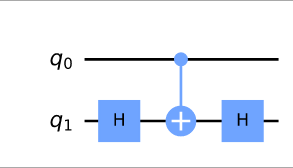

Below is the code to implement a basic CZ gate on two qubits, the control and the target. Note how this corresponds exactly to the gates in the image above!

In [ ]:
def controlled_Z(circuit, control, target):
    """ Implement a Z gate with a single control. """
    circuit.h(target)
    circuit.cx(control, target)
    circuit.h(target)

The next code cell will contain the **phase oracle** for targeting the $|11\rangle$ state. When we want to target this state, the oracle is just a CZ gate. The oracle looks like this:

In [ ]:
def phase_oracle(circuit, register):
    # Call function that implements the CZ gate on a 2-qubit register.
    # Equivalently, we could call the built in function on our QuantumRegister: 
    # circuit.cz(register[0], register[1])
    controlled_Z(circuit, register[0], register[1])

In the next cell, we'll implement the Grover diffusion operator. The comments explain each step of the operation.

In [ ]:
def grover_diffusion(circuit, register):
    # Apply Hadamard and X gates on all qubits
    circuit.h(register)
    circuit.x(register)
    
    # Create a barrier that isolates different sections of the circuit
    circuit.barrier()
    
    # Apply CZ gate with target as qubit 1
    controlled_Z(circuit, register[0], register[1])
    
    circuit.barrier()
    
    circuit.x(register)
    circuit.h(register)

Next, we'll create the Grover Search quantum circuit targeting state $|11\rangle$ and draw it using the Qiskit tools. When you run this cell, you should see the circuit drawing appear below the cell. The value `tests` may be changed to run Grover's algorithm multiple times on the register.

In [ ]:
# Define circuit constants
qubits = 2
tests = 1

# Instantiate register objects
qr = QuantumRegister(qubits)
cr = ClassicalRegister(qubits)
groverCircuit = QuantumCircuit(qr, cr)

# Initialize circuit with Hadamard gates
groverCircuit.h(qr)

# Run phase oracle and diffusion operators. 
# Can be run multiple times depending on the value "tests".
for test in range(0,tests):
    groverCircuit.barrier()
    phase_oracle(groverCircuit, qr)
    groverCircuit.barrier()
    grover_diffusion(groverCircuit, qr)
    
# Measure quantum registers
groverCircuit.barrier()
groverCircuit.measure(qr,cr)

# Draw Circuit
groverCircuit.draw()

Finally, we'll actually run the quantum algorithm multiple times and find the probability with which we observe each state. This final probability is based on the measurements we make at the end of each experiment. The number of runs can be configured using the value `shots`.

In [ ]:
# Define backend that will simulate the circuit, and transpile the circuit for the Aer backend
# backend = Aer.get_backend('aer_simulator')
backend = AerSimulator()
qobj = transpile(groverCircuit, backend)

# Number of times the circuit is run
shots = 1024

# Execute circuit and plot results on histogram
result = backend.run(qobj, shots=shots).result()
answer = result.get_counts()
plot_histogram(answer)

The histogram should only show the $|11\rangle$ state, with a total of 1024 measurements. Next, you'll use this code and the resources in [Section 5](#resources) to develop oracles for the remaining states.

## 4. Deliverables <a id='deliverables'></a>

1. Prove, using linear algebra, the equivalence between the decomposed CZ gate and the matrix representation of the gate. This may be done using sympy in this notebook (just add a section following this one), or it may be done on paper/electronically and submitted as a separate PDF.
2. In the following sections, develop oracles that target the $|00\rangle$, $|01\rangle$, and $|10\rangle$ states. You may add multiple code cells to each section, or copy the Section 3 code into a single cell for each state and just change the oracle definition. Copy over all the circuit and simulation code. Ensure that you run the code to show **both** a circuit diagram **and** a result histogram from your experiments.
3. Prove that your oracles for the other states implement phase inversion for the desired output. **Hint:** In each case you should end up with a 4x4 matrix that looks like the one shown above for the $|11\rangle$ oracle.

### 4.1 $|00\rangle$ Oracle

In [ ]:
# Add your code here for the |00> oracle

### 4.2 $|01\rangle$ Oracle

In [ ]:
# Add your code here for the |01> oracle

### 4.3 $|10\rangle$ Oracle

In [ ]:
# Add your code here for the |10> oracle

## 5. Resources <a id='resources'></a>

- **IBM Quantum Composer**: https://quantum-computing.ibm.com/composer
- **qBraid**: https://www.qbraid.com/
- **Installing Qiskit**: https://qiskit.org/documentation/install.html
- **Grover Search Explanation**: https://github.com/Qiskit/textbook/blob/main/notebooks/ch-algorithms/grover.ipynb
- **Getting Started With Qiskit**: https://qiskit.org/documentation/tutorials/circuits/1_getting_started_with_qiskit.html
- **Your TA**: Feel free to send me an email with any questions you may have! I also can meet through zoom if needed. ltr6274@rit.edu